# Denoising using signal averaging
Check that the averaging several instances of the same noisy image  approximates to the clean image.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import namedtuple
from skimage import io as skimage_io  # pip install scikit-image
import information_theory as IT # pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"

In [163]:
Args = namedtuple("args", "input")
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [164]:
GT = skimage_io.imread(args.input)

In [165]:
mean = np.mean(GT)
zero_mean_GT = GT.astype(np.float32) - mean
print(np.mean(zero_mean_GT))

0.0


In [166]:
min_PSNR = 60

In [167]:
signal = np.arange(100) - 50
signal

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49])

## When the noise is additive

### Using signal-independent additive uniform noise

In [168]:
noise = np.random.uniform(low=-10, high=10, size=signal.size).astype(np.int32)
noisy = signal + noise

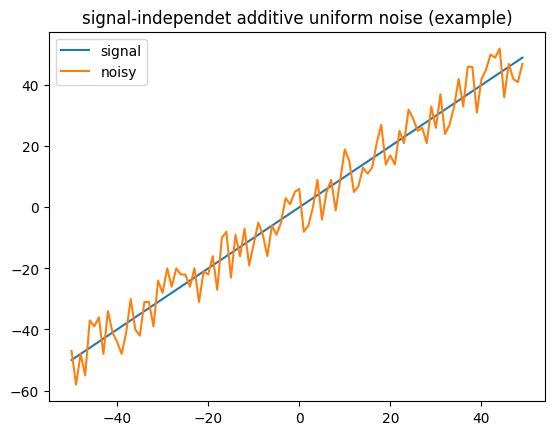

In [169]:
plt.title("signal-independet additive uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [170]:
curves = []
#sigma_index = 1
for c in range(10, 100, 10):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(low=-c, high=c, size=GT.shape).reshape(GT.shape)
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

9.999994982050847 -9.999942757866698
10 1 74.32385515534011

19.999878772533066 -19.99999226081949
20 1 60.52118315376478

29.99995221663204 -29.99989943030123
30 1 52.402591323637175
29.99986587439833 -29.99981288549359
30 2 59.29046157248549
29.999995859980146 -29.999733622020305
30 3 63.28905752430639

39.99979844687036 -39.99976430715311
40 1 46.683191983221484
39.99989733084108 -39.99975153708695
40 2 53.61137126151342
39.99994084552105 -39.99902379116019
40 3 57.63965663603792
39.99946749899044 -39.99999870509383
40 4 60.5044124108013

49.99888767587005 -49.999774703705924
50 1 42.2982748644132
49.999119969534874 -49.99977395424414
50 2 49.240679285324546
49.99987640894457 -49.99980782920487
50 3 53.29809528520491
49.999610991434764 -49.999093301601995
50 4 56.17690468702086
49.99971407101815 -49.999921288032645
50 5 58.36226495801651
49.9999646334787 -49.9998475819387
50 6 60.183614399762234

59.99950648443014 -59.999904807507576
60 1 38.76611671326462
59.999636435851855 -59.999

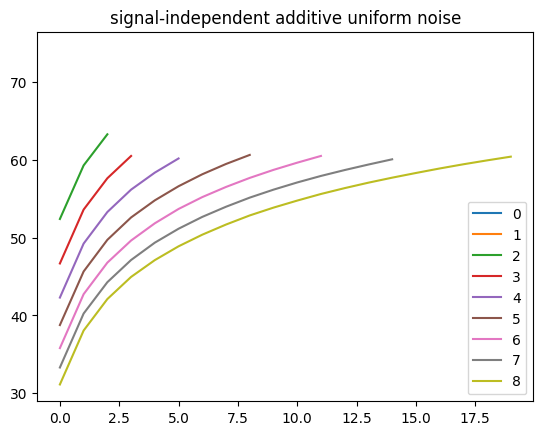

In [171]:
plt.title("signal-independent additive uniform noise")
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

#### An example of real additive (modeled as uniform) noise: quantization noise

In [172]:
noisy = (signal/10).astype(np.int16) * 10

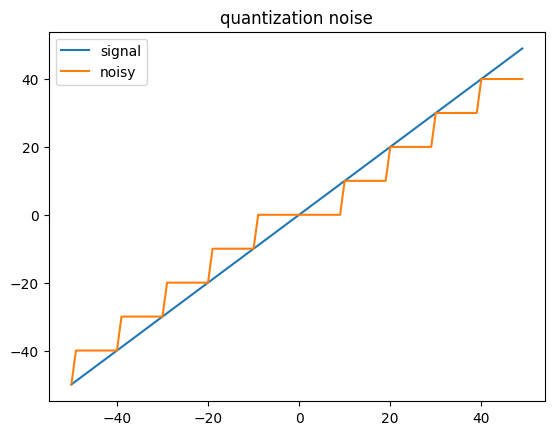

In [173]:
plt.title("quantization noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

However, quantization noise is signal-independent additive noise (for example, when the "clean" signal is 0, the quantization error is always 0.

### Using signal-dependent additive uniform noise

In [202]:
noise = np.random.uniform(low=-signal, high=signal)
noisy = signal + noise

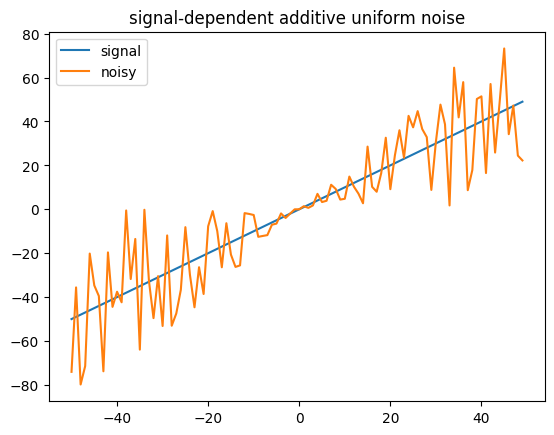

In [203]:
plt.title("signal-dependent additive uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [176]:
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(low=-2*zero_mean_GT/c, high=2*zero_mean_GT/c)
        noisy = GT + noise
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

225.70109966478435 -227.18980638151078
1 1 32.53235782226527
236.28452248167855 -217.28139180810484
1 2 39.09532621139067
230.51195746444006 -229.15756899759515
1 3 42.705520732866034
232.58614629348602 -225.7598593721727
1 4 45.20789652125789
236.6930048490704 -235.09366423705058
1 5 47.05850012368124
231.7054738960769 -231.88880862916764
1 6 48.486412412933674
231.43328816671897 -236.4868551213745
1 7 49.67166822404187
241.90748785920334 -236.6817063129068
1 8 50.68504216489237
231.3352290560057 -217.82402828722812
1 9 51.55072751580475
238.4232558721414 -221.05731293647483
1 10 52.301927522856886
234.05580316840843 -228.76950264076206
1 11 52.98191286643159
227.5592052677137 -230.79071620464265
1 12 53.5528219422048
235.06340123568276 -228.71713304345113
1 13 54.05373937229088
231.38051875259163 -222.3891258786038
1 14 54.53556421774245
242.692098500511 -238.91827692837774
1 15 54.947807165920615
233.95410805424973 -234.68398760464373
1 16 55.33036840991495
225.74753398780035 -241.6

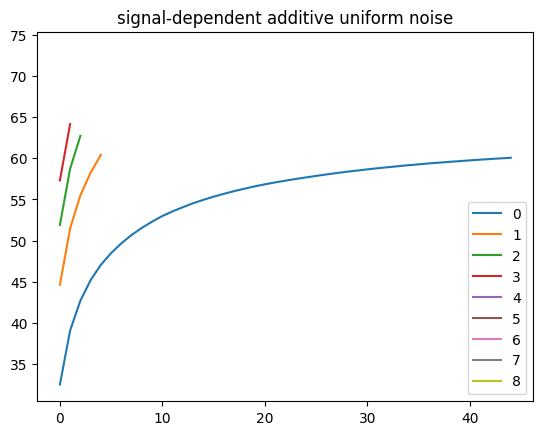

In [177]:
plt.title("signal-dependent additive uniform noise")
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-independent additive Gaussian noise

In [207]:
noise = np.random.normal(loc=0, scale=10, size=signal.size)
noisy = signal + noise

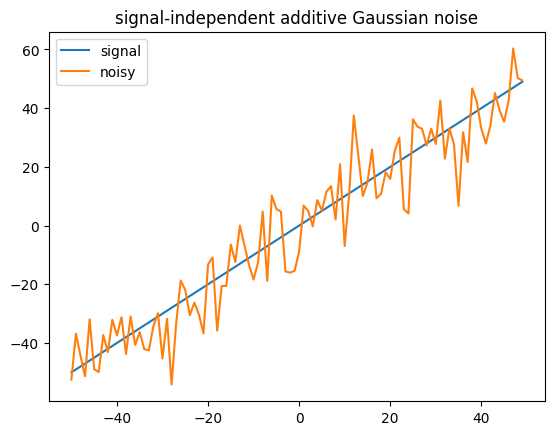

In [208]:
plt.title("signal-independent additive Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [260]:
curves = []
#sigma_index = 1
for std_dev in range(10, 100, 10):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=std_dev, size=GT.shape).reshape(GT.shape)
        print(np.max(noise), np.min(noise))
        noise = GT + noise
        noisy = np.clip(a=noise, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    #print()

41.6061571912778 -50.65578458890628
10 1 60.75609962569704
83.21522472769267 -109.27586827243758
20 1 48.91621816836074
83.7736030546078 -94.16852613899847
20 2 55.05559954389441
81.50137299438624 -89.0076392484402
20 3 58.36983672390697
92.90883315666434 -95.26074748003788
20 4 60.573436452117654
132.15152413104263 -154.09582380191776
30 1 41.5251522588105
144.22560716308914 -134.97027114204806
30 2 48.062617020969086
134.7540783768685 -139.88806452183292
30 3 51.78168817064888
157.330978950925 -148.0635482060545
30 4 54.304295115072996
127.42822601116126 -158.43551303619668
30 5 56.223237248381835
125.94796540200338 -132.16585534152875
30 6 57.7382132409392
126.00682056351963 -156.9610371810825
30 7 58.970225661934904
125.64045142897126 -134.67140295812675
30 8 60.01455395764283
197.8104964506254 -202.43812844558093
40 1 36.29263472416797
171.02358228837016 -190.40132735515624
40 2 43.05472615194584
179.83510756830842 -183.23697895962744
40 3 46.90283283732069
169.52782914893731 -193

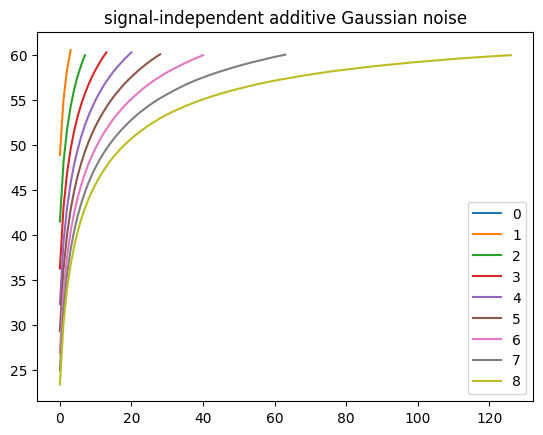

In [261]:
plt.title("signal-independent additive Gaussian noise")
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-dependent additive Gaussian noise

In [187]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noisy = signal + noise

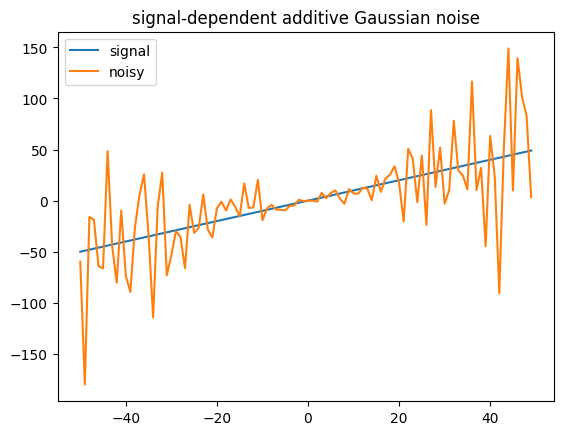

In [188]:
plt.title("signal-dependent additive Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [189]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=GT/std_dev/2)
        noisy = GT + noise
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

381.2226961803682 -381.8546286367099
1 1 29.482751323225184
392.5386063380534 -404.3439256736499
1 2 36.316406906212094
404.65411011692146 -380.6557449246308
1 3 40.239735683222946
400.2068528654452 -426.1651371615892
1 4 42.97487780545461
378.8370618446784 -524.9665880405356
1 5 45.107885392606725
395.64560625655884 -457.5235238286125
1 6 46.85492368579439
399.7365765249064 -525.2423645354152
1 7 48.29157834326984
457.31791866707056 -489.98733190567896
1 8 49.50599402769808
378.7406970353597 -386.4939071602346
1 9 50.58287568448682
419.39278023460315 -392.2095941700414
1 10 51.524377954099954
408.0223199755386 -431.4822680402409
1 11 52.38605291716845
440.68049593676034 -368.83197052046324
1 12 53.17437519617842
389.1972800019052 -424.7452922513326
1 13 53.87705641549536
424.7170621706321 -398.164388529654
1 14 54.51327327752124
372.2283707162902 -411.83303724457113
1 15 55.12257518852011
388.51203850054657 -378.2327709391599
1 16 55.66250268703139
420.33297882503246 -465.101320414603

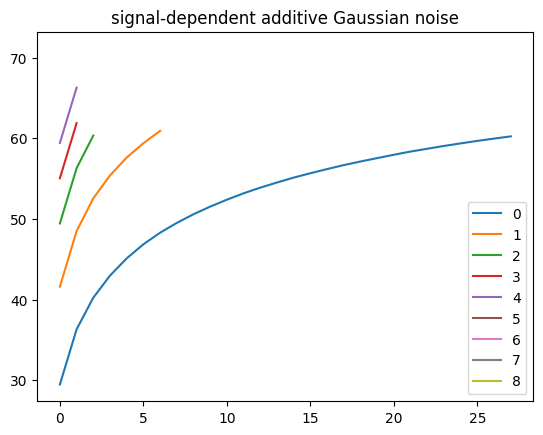

In [190]:
plt.title("signal-dependent additive Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-independent additive Rician noise

## When the noise is multiplicative (speckle noise)

## Using signal-independent multiplicative uniform noise

In [191]:
noise = np.random.uniform(low=-5, high=5, size=signal.size).astype(np.int32)
noisy = signal * (1 + noise/5)
#noisy2 = np.random.uniform(low=-signal/2, high=signal/2) + signal

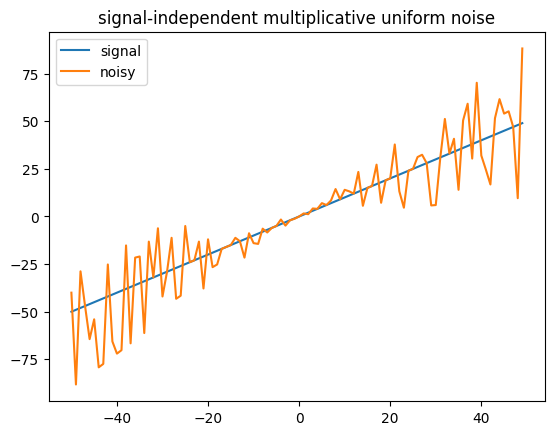

In [193]:
plt.title("signal-independent multiplicative uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
#plt.plot(signal, noisy2, label="noisy2")
plt.legend()
plt.show()

In [194]:
curves = []
#sigma_index = 1
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(-c/10, c/10, GT.shape).reshape(GT.shape)
        #print(np.max(noise), np.min(noise))
        noisy = np.clip(a=GT.astype(np.float32) * (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

1 1 70.34334489013372
2 1 56.534303654806365
2 2 63.41524739015422
3 1 48.51571965234561
3 2 55.38903473114473
3 3 59.39712750746306
3 4 62.26977138881418
4 1 42.85937847382907
4 2 49.79143880208337
4 3 53.82147459673121
4 4 56.688086482066
4 5 58.86926590062309
4 6 60.65561938714715
5 1 38.60417623575646
5 2 45.505175404190574
5 3 49.55468612501387
5 4 52.3866706028261
5 5 54.58686055304809
5 6 56.38824608760434
5 7 57.90333146295006
5 8 59.20027686839029
5 9 60.369626611733835
6 1 35.20907961964308
6 2 42.09533962721703
6 3 46.0825247805881
6 4 48.89775915538412
6 5 51.069392735355834
6 6 52.843276286116534
6 7 54.31177468517167
6 8 55.60110996512259
6 9 56.7199161339892
6 10 57.711252053344424
6 11 58.63716700021417
6 12 59.445117936885474
6 13 60.18753607551527
7 1 32.37527056093486
7 2 39.20688690637799
7 3 43.20571689115284
7 4 46.02816467107765
7 5 48.17191726749785
7 6 49.91311092102749
7 7 51.37162053609168
7 8 52.63860158915752
7 9 53.76459305898087
7 10 54.738393914231125
7 

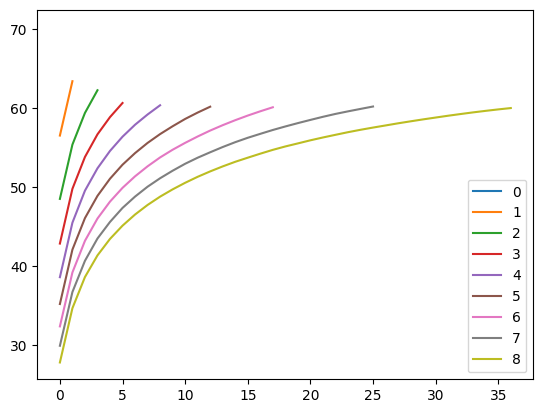

In [195]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-dependent multiplicative uniform noise

In [200]:
noise = np.random.uniform(low=-signal/10, high=signal/10)
noisy = signal * (1 + noise)

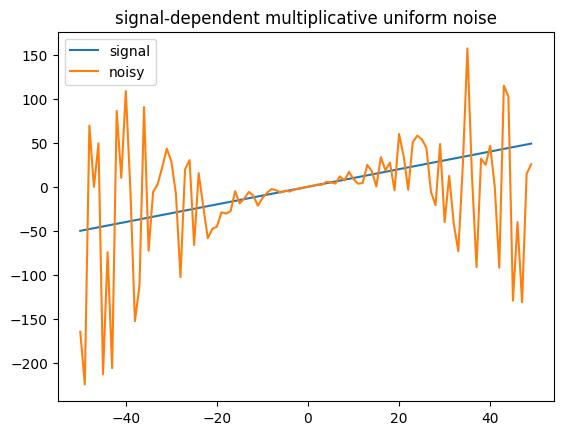

In [201]:
plt.title("signal-dependent multiplicative uniform noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [204]:
curves = []
for c in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.uniform(low=-2*zero_mean_GT/c, high=2*zero_mean_GT/c)
        noisy = GT + (1 + noise)
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(c, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    print()

242.2802332966732 -227.88138444624926
1 1 32.56515200509846
228.43548429010843 -238.63993906666292
1 2 39.04618215751551
240.4663919195554 -246.1211179317016
1 3 42.670333869503295
244.10531543654793 -236.08804724253355
1 4 45.14967570589589
233.6368685412553 -220.27803151534735
1 5 47.002924747872754
233.64097933926143 -238.39349806645686
1 6 48.507792764914385
228.8446950666522 -224.6543157742964
1 7 49.70560234403017
228.33252617677806 -229.60804372930392
1 8 50.695782242351214
232.14618704590606 -243.10000227373314
1 9 51.55536053119175
232.1184136994931 -241.06979214744592
1 10 52.26961846646995
245.32627008448162 -235.76016618885345
1 11 52.91820568154411
241.6312190873315 -231.72381223121488
1 12 53.48162067789882
229.4853426146164 -234.86755010382097
1 13 53.97129810517795
235.58567518939248 -235.24487774791947
1 14 54.44026235591625
234.0519765856701 -240.08698548897206
1 15 54.864358941951615
230.4811586223796 -234.75191712316027
1 16 55.24435897581675
228.76999300615824 -229

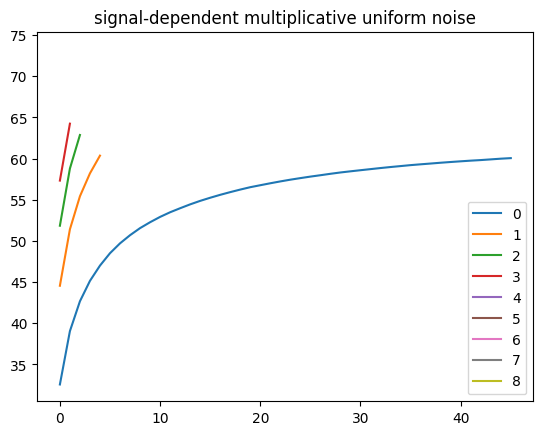

In [206]:
plt.title("signal-dependent multiplicative uniform noise")
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-independent multiplicative Gaussian noise

In [213]:
noise = np.random.normal(loc=0, scale=1, size=signal.size)
noisy = signal * (1 + noise)

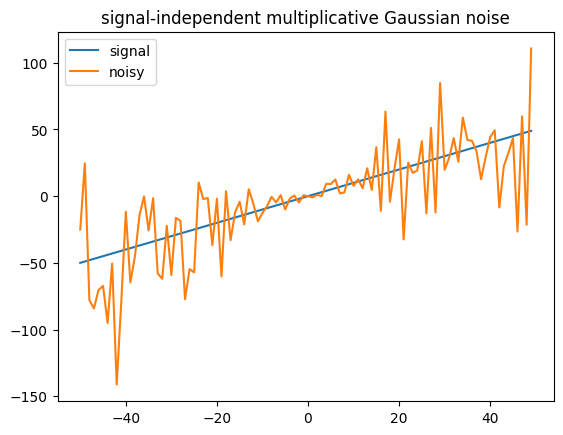

In [214]:
plt.title("signal-independent multiplicative Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [231]:
curves = []
#sigma_index = 1
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=std_dev/15, size=GT.shape).reshape(GT.shape)
        print(np.max(noise), np.min(noise))
        noisy = GT * (1 + noise)
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

0.2925617466372052 -0.3012672137730008
1 1 67.46452775347656

0.6169308608592203 -0.5980651978185338
2 1 53.7303619823406
0.57128157973661 -0.5855147804258326
2 2 60.60934645260887

0.9771073889374433 -0.9740730156612325
3 1 45.77444463016157
0.8904195203576402 -0.9474003397180655
3 2 52.712936428717406
0.9180690125257217 -0.9280854193566457
3 3 56.7124620321211
0.9194355310943338 -0.8872512733670282
3 4 59.609913206215396
0.9699467482374114 -0.9490147493136706
3 5 61.8425534944729

1.186236702937113 -1.1453590552145105
4 1 40.35880819500305
1.1900669963702195 -1.1901482932201781
4 2 47.271444928029595
1.1783288228568158 -1.2642351409003494
4 3 51.29607114260246
1.3571555473503687 -1.1298416462910938
4 4 54.12454845753395
1.2150497855963347 -1.338398681109477
4 5 56.31825930892713
1.160998008805347 -1.1542061698460733
4 6 58.09643696630576
1.2372654815624302 -1.3463344007009248
4 7 59.59739871828869
1.2327746605090308 -1.2640019769300785
4 8 60.87983527474467

1.3933475677321687 -1.509

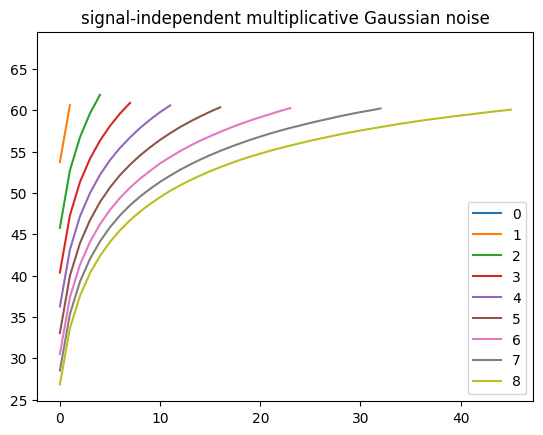

In [233]:
plt.title("signal-independent multiplicative Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

### Using signal-dependent multiplicative Gaussian noise

In [234]:
noise = np.random.normal(loc=0, scale=np.abs(signal))
noisy = signal + (1 + noise)

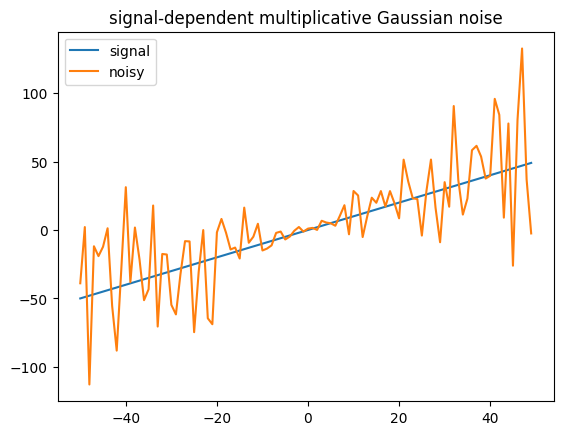

In [235]:
plt.title("signal-dependent multiplicative Gaussian noise")
plt.plot(signal, signal, label="signal")
plt.plot(signal, noisy, label="noisy")
plt.legend()
plt.show()

In [244]:
curves = []
for std_dev in range(1, 10, 1):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(loc=0, scale=GT/(std_dev*300))
        noisy = GT * (1 + noise)
        print(np.max(noise), np.min(noise))
        noisy = np.clip(a=noisy, a_min=0, a_max=255).astype(np.uint8)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #sigma_index += 1
    print()

2.7534862807296365 -2.42690633691744
1 1 30.698749825535636
2.596396081471062 -2.6621100590160163
1 2 37.34529221574001
2.618088343313591 -2.871278712748273
1 3 41.19152119511716
2.48128238503906 -2.593015788772762
1 4 43.8656402587135
2.501137447134454 -2.59056637509597
1 5 45.87839393038456
2.796660216592961 -2.654302278220553
1 6 47.48431492615056
2.7121323594107554 -2.7028189834999994
1 7 48.81695811704938
2.7176783527817103 -3.2346359992638236
1 8 49.93689912226866
2.560913242606294 -2.801381228952676
1 9 50.90938407819554
3.205091351989649 -2.456511868007467
1 10 51.74476958088222
2.612614344216582 -2.7605110958718684
1 11 52.47870331780514
2.95687194617064 -2.527208248315754
1 12 53.127038911628006
2.7138910779046044 -2.729129454411026
1 13 53.731309644157776
2.527024102312647 -2.9272129032646386
1 14 54.281186432045125
2.5751538395122036 -2.579951774214294
1 15 54.76404561092899
2.855939013265918 -2.7653739798778663
1 16 55.23890850433743
2.8285747461206583 -2.674975493039996
1

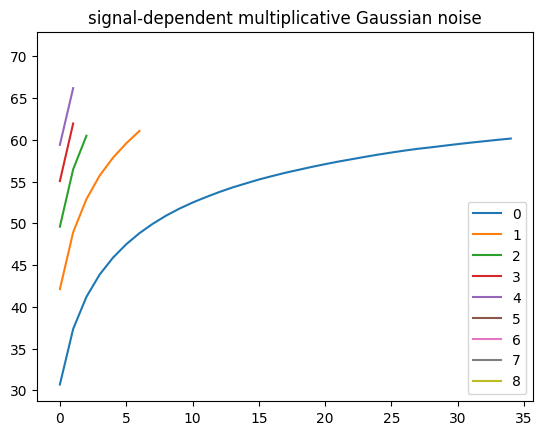

In [245]:
plt.title("signal-dependent multiplicative Gaussian noise")
for i in range(len(curves)):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

## Multiplicative Poisson noise (shot noise)

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(GT)
min_intensity = np.min(GT)
dynamic_range = max_intensity - min_intensity
normalized_GT = (GT - min_intensity) / dynamic_range
#print("GT", np.max(GT), np.min(GT))
#print(normalized_GT.dtype)
#for _lambda in range(20, 200, 20):
for _lambda in range(2, 20, 2):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_GT*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        noisy = np.random.poisson(normalized_GT*_lambda) # noisy[i]~Poisson(normalized_GT[i]*_lambda)~
        noisy = dynamic_range * noisy/_lambda + min_intensity
        #noisy = dynamic_range * np.random.normal(normalized_GT*_lambda)/_lambda + min_intensity
        #print('a', np.max(noisy), np.min(noisy), np.mean(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #print('b', np.mean(denoised))
        plt.imshow(denoised, cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    print()

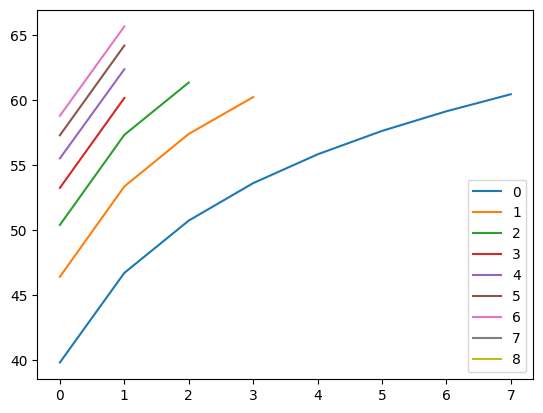

In [250]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

In [ ]:
x = np.arange(10)
print(np.random.normal(x, scale=1.0))
print(np.random.poisson(x))

In [ ]:
curves = []
#sigma_index = 1
max_intensity = np.max(GT)
min_intensity = np.min(GT)
dynamic_range = max_intensity - min_intensity
normalized_GT = (GT - min_intensity) / dynamic_range
#print("GT", np.max(GT), np.min(GT))
#print(normalized_GT.dtype)
for std_dev in range(10, 100, 10):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        #noisy = np.clip(a = dynamic_range * np.random.poisson(normalized_GT*_lambda)/_lambda + min_intensity,  a_min=0, a_max=255).astype(np.uint8)
        #noisy = dynamic_range * np.random.normal(normalized_GT*std_dev)/std_dev + min_intensity
        noisy = np.random.normal(loc=GT, scale=std_dev)
        print('a', np.max(noisy), np.min(noisy))
        noisy = np.clip(a = noisy, a_min=0, a_max=255)
        noisy = noisy.astype(np.uint8)
        #print('b', np.max(noisy), np.min(noisy))
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(_lambda, iters, PSNR, np.max(denoised), np.min(denoised))
        curve.append(PSNR)
        iters += 1
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

    curves.append(curve)
    #print()

In [ ]:
curves = []
mean = 0
#sigma_index = 1
for std_dev in range(10, 40, 4):
    acc_denoised = np.zeros_like(GT, dtype=np.float64)
    PSNR = 1
    iters = 1
    curve = []
    while PSNR < min_PSNR:
        noise = np.random.normal(mean, std_dev, GT.shape).reshape(GT.shape)
        print(np.max(noise), np.min(noise))
        #noisy = np.clip(a=GT.astype(np.float32) + (1 + noise), a_min=0, a_max=255).astype(np.uint8)
        noisy = dynamic_range * np.random.normal(normalized_GT*_lambda)/_lambda + min_intensity
        #noisy = GT.astype(np.float32) * (1+noise)
        acc_denoised += noisy
        denoised = acc_denoised/iters
        PSNR = IT.distortion.PSNR(denoised.astype(np.uint8), GT)
        print(std_dev, iters, PSNR)
        curve.append(PSNR)
        iters += 1
        plt.imshow(np.clip(denoised, 0, 255).astype(np.uint8), cmap="gray")
        plt.show()
        input()

    curves.append(curve)
    #sigma_index += 1
    #print()

In [ ]:
for i in range(len(range(10,100,10))):
    plt.plot(curves[i], label=i)
    #print(i)
plt.legend()
plt.show()

In [ ]:
mean = 0
var = 1000
std_dev = 30
noise = np.random.normal(mean, std_dev, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
IT.distortion.PSNR(noisy, GT)

In [ ]:
IT.

In [ ]:
np.max(noisy)

In [ ]:
np.min(noisy)

In [ ]:
plt.imshow(noisy, cmap="gray")

In [ ]:
denoised = cv2.fastNlMeansDenoising(noisy, None, h=33, templateWindowSize=7, searchWindowSize=9)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
axs[0].imshow(noisy, cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised, cmap="gray")
axs[1].set_title(f"Denoised (DQI={information_theory.information.compute_quality_index(noisy, denoised)})")
fig.tight_layout()
plt.show()

In [ ]:
np.mean(noisy)

In [ ]:
np.mean(denoised)

In [ ]:
denoised = GT

In [ ]:
denoised.dtype

In [ ]:
from skimage.metrics import structural_similarity as ssim
from scipy import stats

In [ ]:
diff = (noisy - denoised).astype(np.uint8)

In [ ]:
plt.imshow(diff, cmap="gray")

In [ ]:
_, N = ssim(noisy, diff, full=True)

In [ ]:
plt.imshow(N, cmap="gray")

In [ ]:
_, P = ssim(noisy, denoised.astype(np.uint8), full=True)

In [ ]:
plt.imshow(P, cmap="gray")

In [ ]:
quality, _ = stats.pearsonr(N.flatten(), P.flatten())

In [ ]:
quality